# 03_tensorflow_cnn

- Fashion MNIST Example -

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(xtr, ytr), (xt, yt) = fashion_mnist.load_data()
#fashion_mnist data load

print(xtr.shape)
print(ytr.shape)
print()
print(xt.shape)
print(yt.shape)
print()
print(ytr)
print(yt)
#28*28 크기의 이미지 데이터
#학습/ 테스트 데이터 수 = 60000 / 10000
#0~9 의 숫자로 정답이 표기돼있음.
#티셔츠/탑 0, 트라우져 1, 풀오버 2, 드레스 3, 코트 4, 샌들 5, 셔츠 6, 스니커즈 7, 가방 8, 앵클 부츠 9

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)

(10000, 28, 28)
(10000,)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


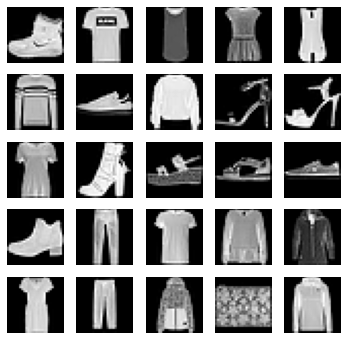

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))

for idx in range(25):
#25 개의 이미지 출력

    plt.subplot(5,5, idx + 1)
    #5행 5열
    plt.imshow(xtr[idx], cmap = 'gray')
    plt.axis('off')
    
plt.show()

In [3]:
#데이터 전처리(minmax 정규화)

xtr = (xtr - 0.0) / (255.0 - 0.0)
xt = (xt - 0.0) / (255.0 - 0.0)
#max = 255.0, min = 0.0

In [4]:
#모델링 및 컴파일

md = tf.keras.Sequential()

md.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
#28*28 크기 2차원 이미지를 784 개의 1차원 벡터로 변환

md.add(tf.keras.layers.Dense(100, activation = 'relu'))

md.add(tf.keras.layers.Dense(10, activation = 'softmax'))

md.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),\
          loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#정답 데이터를 원핫 인코딩 처리하지 않아서 sparse_crossentropy 손실 함수 사용

md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
#모델 학습

hist = md.fit(xtr, ytr, epochs = 30, validation_split = 0.3)
#데이터 중 30%의 검증용 데이터셋 생성(모델의 overfitting 을 monitoring)

Epoch 1/30
1313/1313 [==============================] - 7s 4ms/step - loss: 0.5418 - accuracy: 0.8124 - val_loss: 0.4477 - val_accuracy: 0.8398
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4032 - accuracy: 0.8556 - val_loss: 0.4007 - val_accuracy: 0.8539
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3615 - accuracy: 0.8696 - val_loss: 0.3656 - val_accuracy: 0.8689
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3327 - accuracy: 0.8785 - val_loss: 0.3982 - val_accuracy: 0.8493
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3158 - accuracy: 0.8845 - val_loss: 0.3626 - val_accuracy: 0.8688
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2948 - accuracy: 0.8917 - val_loss: 0.3627 - val_accuracy: 0.8710
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2829 - accuracy: 0.8956 - val_loss: 0.3431 - val_accuracy:

In [6]:
#모델 정확도 평가

md.evaluate(xt, yt)

313/313 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8838


[0.41044560074806213, 0.8838000297546387]

*fashion_mnist 테스트 데이터에 대해 약 88% 의 모델 정확도를 확인할 수 있었습니다.

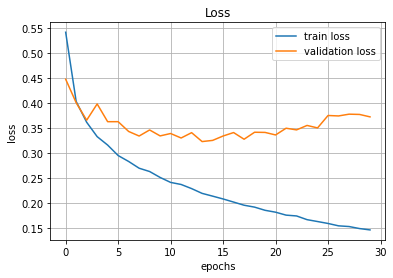

In [7]:
#손실 시각화

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc = 'best')

plt.show()

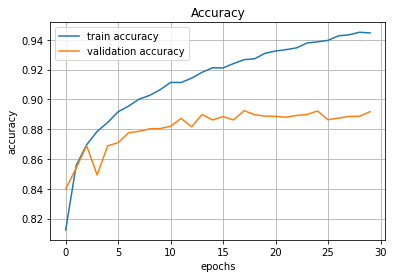

In [8]:
#정확도 시각화

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend(loc = 'best')

plt.show()

*약 87% accuracy 부근에서 train 과 validation 데이터의 accuracy 격차가 많이 벌어짐.

*해당 구간부터 모델의 overfitting 이 일어나는 것을 알 수 있습니다.

313/313 [==============================] - 1s 2ms/step


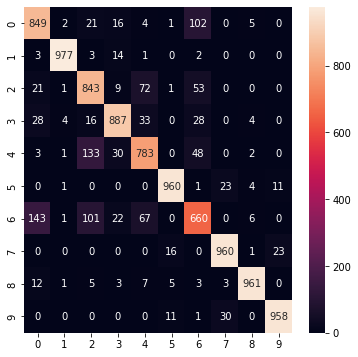

In [9]:
#혼동 행렬

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (6, 6))

pred = md.predict(xt)
#테스트 데이터 예측

cm = confusion_matrix(yt, 
                      np.argmax(pred, axis = -1))

sns.heatmap(cm, annot = True, fmt = 'd')
#혼동행렬 히트맵으로 시각화

plt.show()

In [10]:
for i in range(10):
    
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

label = 0	(849/1000)	accuracy = 0.849
label = 1	(977/1000)	accuracy = 0.977
label = 2	(843/1000)	accuracy = 0.843
label = 3	(887/1000)	accuracy = 0.887
label = 4	(783/1000)	accuracy = 0.783
label = 5	(960/1000)	accuracy = 0.960
label = 6	(660/1000)	accuracy = 0.660
label = 7	(960/1000)	accuracy = 0.960
label = 8	(961/1000)	accuracy = 0.961
label = 9	(958/1000)	accuracy = 0.958


*생성한 모델에서 label 1(트라우져) 정확도 약 98% 로 가장 높은 정확도를 보여줬습니다.

*생성한 모델에서 label 6(셔츠) 정확도 약 66% 로 가장 낮은 정확도를 보여줬습니다.

- Convolution(컨볼루션, 합성곱) -

*데이터 관점에서 곱셈 연산 - 원본 데이터 or 입력 데이터에 변화(variation) 을 주어 출력 데이터를 생성.

*데이터 관점에서 덧셈 연산 - 데이터의 평균(mean) 을 구한다는 의미를 내포.

*convolution - 시간의 흐름에 따라 데이터 g(x) 가 이동하면서,

입력 데이터 f(x) 를 평균적으로 얼마나 변화시키는지(평균적으로 얼마나 변하는지) 나타내는 개념.

NN(Neural network) vs. CNN(Convolution -)

*NN 에서 은닉층 역할을 CNN 에서 여러 개의 convolution 층, 그리고 출력층 앞의 완전 연결층(flatten) 으로 대신 수행.

conv - 입력 데이터와 다양한 필터(가중치 집합체) 와의 convolution 연산을 통해 입력 데이터의 feature 추출하는 역할 수행.

pooling - 입력 정보를 max/min/mean 값 등으로 압축하여 데이터 연산량을 줄여주는 역할 수행 후, 다음 층으로 넘겨줌.

(일반적으로 max pooling 을 가장 많이 사용)

convolution 연산 - 필터를 일정간격(stride) 로 이동해가면서 입력데이터와 필터 대응 원소끼리 곱한 후 모두 더해주는 연산,

-stride : 필터의 이동 간격

- 패딩(padding) : convolution 연산 전, 입력 데이터 주변을 특정값으로 채움.

*데이터 크기가 줄어드는 단점을 방지하기 위해 사용.

연산을 통한 출력 데이터 크기 : (OH, OW), OH 행 OW 열

OH = (H + 2P - FH) / S + 1

OW = (W + 2P - FW) / S + 1

(H, W) - 입력데이터 크기, (FH, FW) - 필터데이터 크기, P - 패딩, S - 스트라이드

- CNN, MNIST / Fashion MNIST Example -

이미지 분류를 위해 사용되는 일반적인 CNN 구조)

특징 추출기(feature extractor) + 분류기(classifier) 결합 형태

특징 추출기 - 이미지 데이터 특징을 추출하고 압축하는 역할, conv layer 와 pooling layer 의 다양한 조합으로 이루어짐.

분류기 - 정답 분류하는 역할 수행, 완전연결층(dense layer) 과 dropout layer(오버피팅 방지) 로 이루어짐.

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(xtr, ytr), (xt, yt) = mnist.load_data()
#mnist data load

xtr = xtr.reshape(-1, 28, 28, 1)
xt = xt.reshape(-1, 28, 28, 1)
#tensor 로 변환(높이, 너비, 채널 형태)

xtr = xtr.astype(np.float32)/255.0
xt = xt.astype(np.float32)/255.0
#정규화

11490434/11490434 [==============================] - 2s 0us/step


In [12]:
#CNN Modeling example

cnn = Sequential()

cnn.add(Conv2D(input_shape = (28,28,1), kernel_size = (3, 3), filters = 32, activation = 'relu'))
cnn.add(Conv2D(kernel_size = (3, 3), filters = 64, activation = 'relu'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
#네 개의 데이터로 압축 후 최대값 출력(maxpooling)

cnn.add(Dropout(0.25))
#overfitting 방지 위해 25% 비율로 data dropout

#---------------------- (윗쪽 : Feature extractor), (아래쪽 : Classifier) -----------------------------------

cnn.add(Flatten())
#3차원 텐서를 1차원 벡터로 변환

cnn.add(Dense(128, activation = 'relu'))
#은닉층

cnn.add(Dropout(0.5))

cnn.add(Dense(10, activation = 'softmax'))
#출력층

In [13]:
#CNN Model Compiling & training

cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(),\
           metrics = ['accuracy'])

hist = cnn.fit(xtr, ytr, batch_size = 128, epochs = 100, validation_data = (xt, yt))

Epoch 1/100
469/469 [==============================] - 11s 9ms/step - loss: 0.2569 - accuracy: 0.9208 - val_loss: 0.0550 - val_accuracy: 0.9820
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0904 - accuracy: 0.9728 - val_loss: 0.0448 - val_accuracy: 0.9851
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0686 - accuracy: 0.9797 - val_loss: 0.0361 - val_accuracy: 0.9874
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0551 - accuracy: 0.9827 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0298 - val_accuracy: 0.9903
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0403 - accuracy: 0.9879 - val_loss: 0.0277 - val_accuracy: 0.9917
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.0290 - val_accuracy: 0.991

In [14]:
#CNN Model 정확도 평가

cnn.evaluate(xt, yt)

313/313 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.9938


[0.05197156220674515, 0.9937999844551086]

In [15]:
from tensorflow.keras.datasets import fashion_mnist

(xtr, ytr), (xt, yt) = fashion_mnist.load_data()
#fashion_mnist data load

xtr = xtr.reshape(-1, 28, 28, 1)
xt = xt.reshape(-1, 28, 28, 1)

xtr = xtr.astype(np.float32)/255.0
xt = xt.astype(np.float32)/255.0

cnn = Sequential()

cnn.add(Conv2D(input_shape = (28,28,1), kernel_size = (3, 3), filters = 32, activation = 'relu'))
cnn.add(Conv2D(kernel_size = (3, 3), filters = 64, activation = 'relu'))
cnn.add(MaxPool2D(pool_size = (2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation = 'softmax'))

cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(),\
           metrics = ['accuracy'])

hist = cnn.fit(xtr, ytr, batch_size = 128, epochs = 100, validation_data = (xt, yt))

Epoch 1/100
469/469 [==============================] - 5s 9ms/step - loss: 0.5205 - accuracy: 0.8165 - val_loss: 0.3293 - val_accuracy: 0.8820
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.3386 - accuracy: 0.8792 - val_loss: 0.2792 - val_accuracy: 0.8977
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2896 - accuracy: 0.8947 - val_loss: 0.2562 - val_accuracy: 0.9062
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2593 - accuracy: 0.9069 - val_loss: 0.2560 - val_accuracy: 0.9068
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2360 - accuracy: 0.9132 - val_loss: 0.2353 - val_accuracy: 0.9124
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2175 - accuracy: 0.9197 - val_loss: 0.2333 - val_accuracy: 0.9150
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.2026 - accuracy: 0.9257 - val_loss: 0.2190 - val_accuracy: 0.9228

In [16]:
cnn.evaluate(xt, yt)

313/313 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.9311


[0.42454105615615845, 0.9311000108718872]